### Import the data

In [1]:
import pandas as pd

df = pd.read_csv('data/BCCC-CIRA-CIC-DoHBrw-2020.csv')

### Reduce the Dimensionality of the data

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop('Label', axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

pca = PCA(n_components=9)
pca.fit(scaled_data)

pca_data = pca.transform(scaled_data)

pca_df = pd.DataFrame(pca_data, columns=[f"PC{i}" for i in range(1, pca_data.shape[1] + 1)])

data_pca = pd.concat([pca_df, df['Label']], axis=1)

data_pca.to_csv('data/data_pca.csv', index=False)

data_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Label
0,0.285085,-1.249350,-0.759257,1.888085,-1.590036,0.336527,0.273810,-1.395804,-0.656521,Benign
1,-2.273445,0.500420,0.593572,-0.998189,0.485258,0.288814,-0.284145,-0.544298,0.133786,Malicious
2,0.073346,0.110297,-0.400756,0.504221,-0.519807,0.305448,-0.247252,-0.087343,0.297351,Malicious
3,-1.385342,1.301977,7.229436,5.777777,4.153107,7.815305,-1.993913,5.096193,1.106648,Benign
4,4.752019,1.753858,-0.100404,-3.372315,-0.304409,1.686262,1.517773,0.127171,-0.515014,Benign
...,...,...,...,...,...,...,...,...,...,...
499101,-2.548642,0.895743,0.371247,-1.274198,0.582710,0.000490,-0.338726,0.329655,1.434713,Malicious
499102,-2.257067,0.417569,0.575092,-1.020603,0.533300,0.304005,-0.365088,-0.530440,0.152897,Malicious
499103,-3.135720,0.992445,1.009003,-1.335718,0.513383,-0.253135,0.080876,0.272532,-0.242866,Malicious
499104,0.278261,-1.245500,-0.762363,1.898707,-1.591484,0.334810,0.267514,-1.398521,-0.648077,Benign


### Visualize the data

C:\Users\ricar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ricar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ricar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ricar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

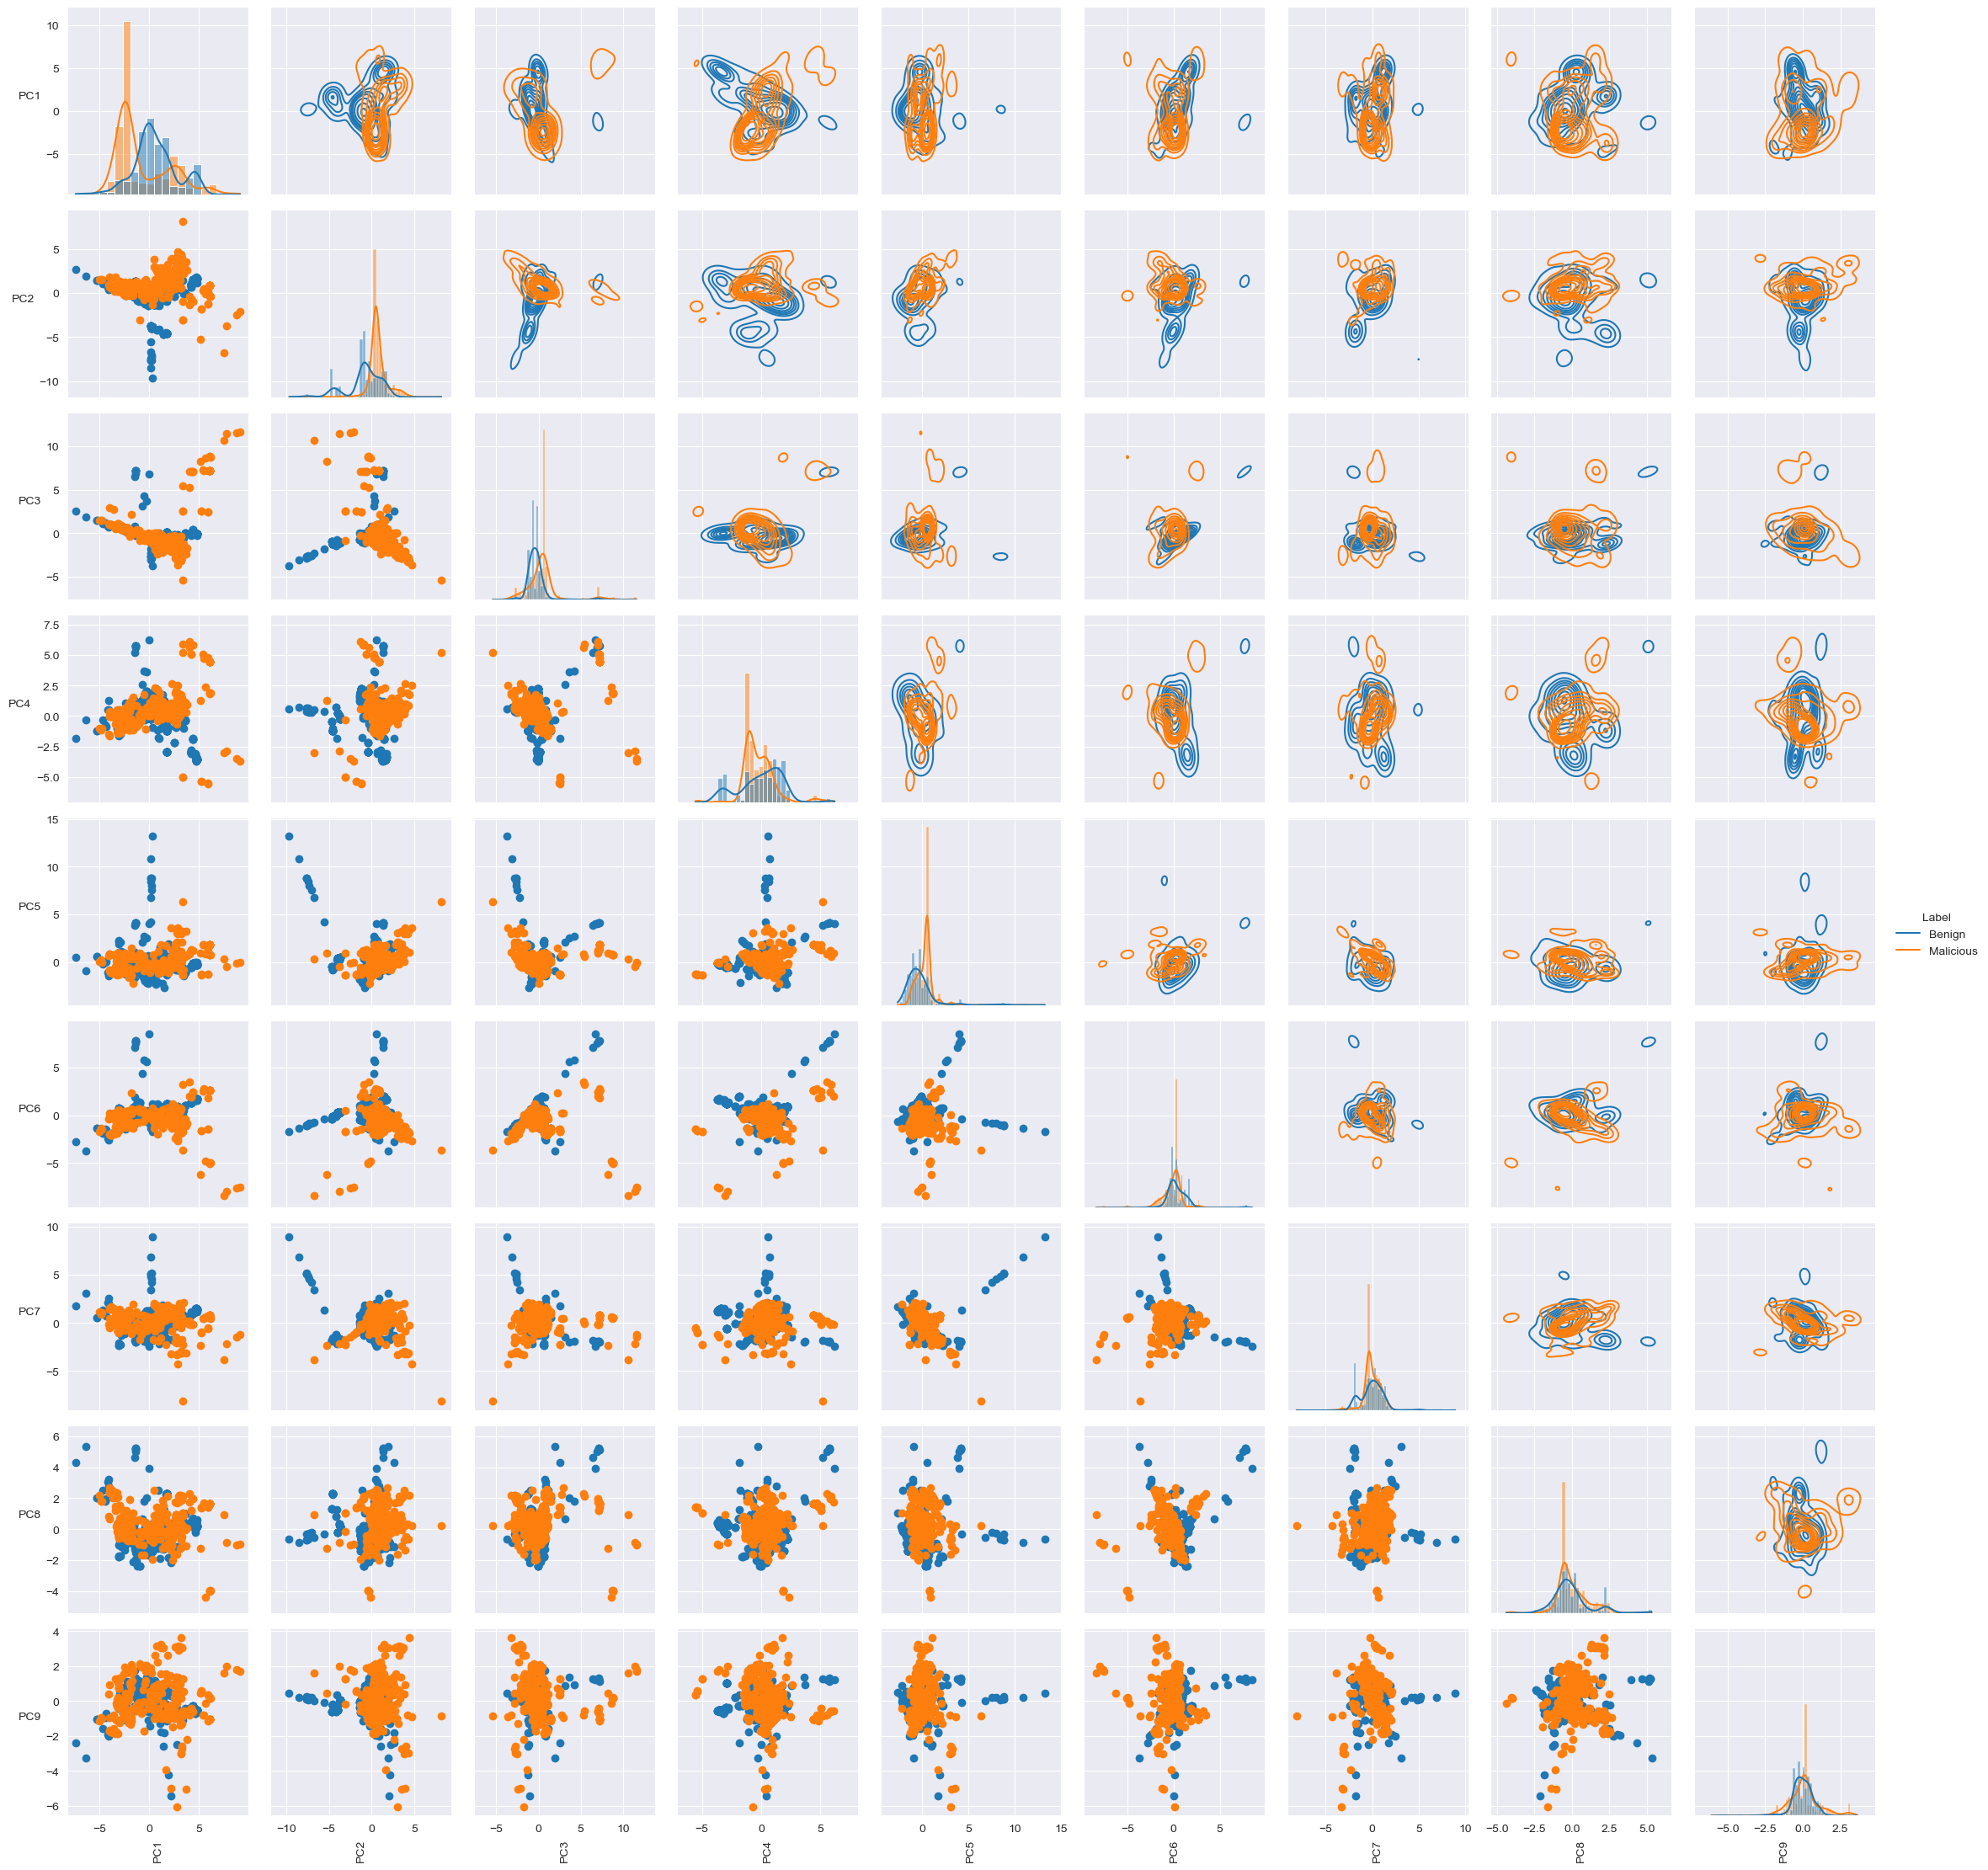

In [5]:
import matplotlib.pyplot as plt
import seaborn as sb

g = sb.PairGrid(data_pca.iloc[:1000][:], hue="Label")
g.map_diag(sb.histplot, kde=True, hist_kws={'alpha':0.5})
g.map_lower(plt.scatter)
g.map_upper(sb.kdeplot)

g.add_legend()

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    ax.yaxis.get_label().set_horizontalalignment('right')

plt.savefig('pca.png')
plt.show()